In [1]:
# Import necessary libraries

import numpy as np  # Import numpy for numerical computations
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt  # Import matplotlib for plotting

import math
import copy

from sklearn.linear_model import LogisticRegression # Import Logistic Regression model
from sklearn.model_selection import train_test_split # Import function for splitting data into train and test sets
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset from the specified file path
ds = pd.read_csv('/kaggle/input/dataset/SVMtrain.csv')

# Display the loaded dataset
ds

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
884,887,0,2,Male,27.0,0,0,13.0000,3
885,888,1,1,female,19.0,0,0,30.0000,3
886,889,0,3,female,60.0,1,2,23.4500,3
887,890,1,1,Male,26.0,0,0,30.0000,1


In [3]:
#get all categorical columns
cat_columns = ds.select_dtypes(['object']).columns

#convert all categorical columns to numeric
ds[cat_columns] = ds[cat_columns].apply(lambda x: pd.factorize(x)[0])

# Display the dataset
ds

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,3
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,3
3,4,1,1,1,35.0,1,0,53.1000,3
4,5,0,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
884,887,0,2,0,27.0,0,0,13.0000,3
885,888,1,1,1,19.0,0,0,30.0000,3
886,889,0,3,1,60.0,1,2,23.4500,3
887,890,1,1,0,26.0,0,0,30.0000,1


In [6]:
ds

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,3
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,3
3,4,1,1,1,35.0,1,0,53.1000,3
4,5,0,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
884,887,0,2,0,27.0,0,0,13.0000,3
885,888,1,1,1,19.0,0,0,30.0000,3
886,889,0,3,1,60.0,1,2,23.4500,3
887,890,1,1,0,26.0,0,0,30.0000,1


In [4]:
# Give dataset’s structure and information
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.6 KB


In [7]:
# returns the number of missing values in the dataset
ds.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [9]:
# Calculate the count of each unique value in the 'Survived' column
ds['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [10]:
 # Check statistics of dataset
ds.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.350956,35.686355,0.524184,0.382452,32.096681,2.535433
std,256.998173,0.486260,0.834700,0.477538,17.756733,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,2.000000
50%,446.000000,0.000000,3.000000,0.000000,32.000000,0.000000,0.000000,14.454200,3.000000
75%,668.000000,1.000000,3.000000,1.000000,54.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [6]:
# Separate features (X) and target variable (y)
# Target variable: 'Survived' column
y = ds.iloc[:, 1]  # 2nd column

# Features: Exclude the 'Survived' column
x = ds.drop(columns=ds.columns[1])

In [8]:
# print the target variable
y

0      0
1      1
2      1
3      1
4      0
      ..
884    0
885    1
886    0
887    1
888    0
Name: Survived, Length: 889, dtype: int64

In [9]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,1,0,7.2500,3
1,2,1,1,38.0,1,0,71.2833,1
2,3,3,1,26.0,0,0,7.9250,3
3,4,1,1,35.0,1,0,53.1000,3
4,5,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
884,887,2,0,27.0,0,0,13.0000,3
885,888,1,1,19.0,0,0,30.0000,3
886,889,3,1,60.0,1,2,23.4500,3
887,890,1,0,26.0,0,0,30.0000,1


In [10]:
# scaling input data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [11]:
# convert pandas to numpy array
y_train = y.to_numpy()

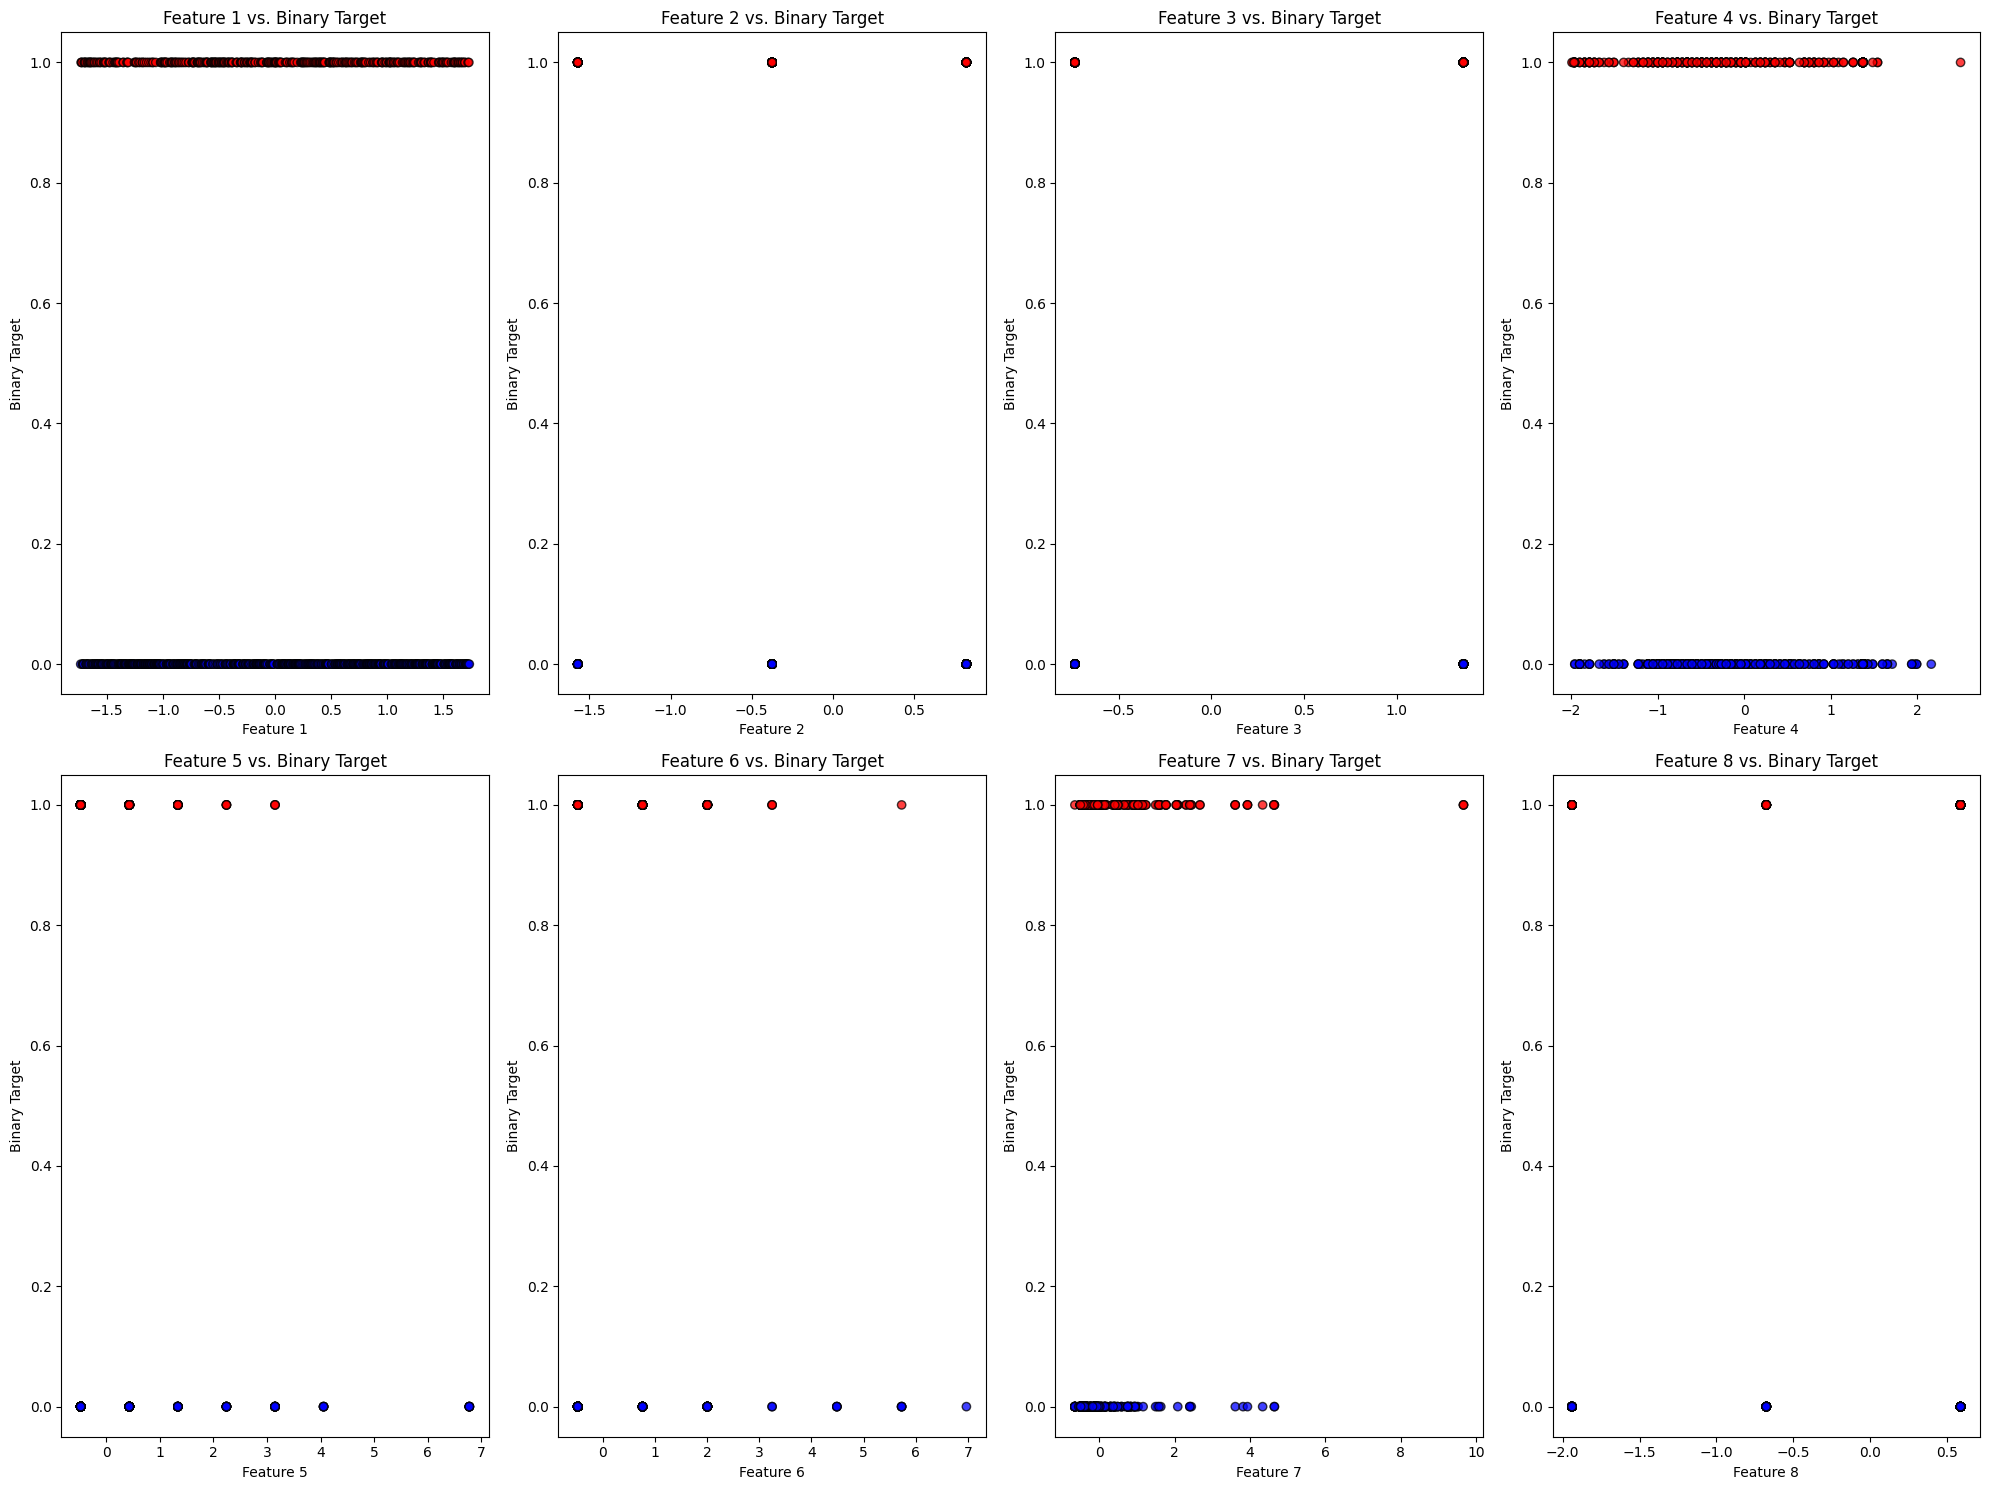

In [15]:
# Data visulation
y_train = y_train.reshape(-1)

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 15))

# Plot each feature against the binary target
for k in range(8):  # We only have 8 subplots, adjust as necessary
    i = k // 4  # Row index
    j = k % 4   # Column index
    axes[i, j].scatter(x[:, k], y_train, c=y_train, cmap='bwr', alpha=0.75, edgecolor='k')
    axes[i, j].set_title(f'Feature {k+1} vs. Binary Target')
    axes[i, j].set_xlabel(f'Feature {k+1}')
    axes[i, j].set_ylabel('Binary Target')
# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y_train, test_size = 0.25, stratify = y_train,random_state = 2)

In [17]:
# view the training variable
print("Elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

print("\n Elements in y_train are:\n", Y_train[:5])
print("Type of y_train:",type(Y_train))

Elements in X_train are:
 [[-0.72804122 -1.57221121  1.35991138 -0.03867501 -0.47519908 -0.47432585
   9.66855078 -1.93955453]
 [ 1.24584594 -1.57221121  1.35991138  0.86289888  0.43135024 -0.47432585
   0.92333479  0.58683958]
 [ 1.35485746 -1.57221121 -0.73534203  1.37003419 -0.47519908 -0.47432585
  -0.02820402 -1.93955453]
 [-0.32703456 -0.37350129 -0.73534203 -0.37676522  0.43135024 -0.47432585
  -0.08809988 -1.93955453]
 [-0.19077016  0.82520863  1.35991138 -0.26406848 -0.47519908 -0.47432585
  -0.48807536  0.58683958]]
Type of X_train: <class 'numpy.ndarray'>

 Elements in y_train are:
 [1 1 0 0 0]
Type of y_train: <class 'numpy.ndarray'>


In [18]:
# Check the dimensions of training variables
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(Y_train.shape))
print ('We have m = %d training examples' % (len(Y_train)))

The shape of X_train is: (666, 8)
The shape of y_train is: (666,)
We have m = 666 training examples


In [19]:
# view the testing variables
print("Elements in x_test are:\n", X_test)
print("Type of X_test:",type(X_test))

print("Elements in y_test are:\n", Y_test)
print("Type of Y_test:",type(Y_test))

Elements in x_test are:
 [[ 0.66574892  0.82520863 -0.73534203 ...  0.76589674 -0.35628836
   0.58683958]
 [-1.69357182  0.82520863  1.35991138 ...  0.76589674 -0.30998232
   0.58683958]
 [ 0.21802304  0.82520863  1.35991138 ... -0.47432585 -0.49017322
  -0.67635748]
 ...
 [-0.39322012 -0.37350129 -0.73534203 ... -0.47432585 -0.38447465
   0.58683958]
 [ 0.58399028  0.82520863 -0.73534203 ...  0.76589674 -0.15999101
   0.58683958]
 [ 0.9538508  -1.57221121 -0.73534203 ... -0.47432585  0.50138005
   0.58683958]]
Type of X_test: <class 'numpy.ndarray'>
Elements in y_test are:
 [0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1
 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 

In [20]:
# Check the dimensions of testing variables
print ('The shape of X_test is: ' + str(X_test.shape))
print ('The shape of y_test is: ' + str(Y_test.shape))
print ('We have m = %d testing examples' % (len(Y_test)))

The shape of X_test is: (223, 8)
The shape of y_test is: (223,)
We have m = 223 testing examples


# **Model Training**

In [21]:
# Sigmoid function
def sigmoid(z): 
    g = 1/(1+np.exp(-z)) 
    return g

In [22]:
# Use the sigmoid function implemented above to get the sigmoid values
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid([ -2, 0, 1, 2]) = " + str(sigmoid(np.array([-2, 0, 1, 2]))))

sigmoid(0) = 0.5
sigmoid([ -2, 0, 1, 2]) = [0.11920292 0.5        0.73105858 0.88079708]


In [23]:
# Cost Function
def compute_cost(X, y, w, b, lambda_= 1):

    m, n = X.shape
#     print(X.shape)
    
    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
    total_cost = cost/m

    return total_cost

In [26]:
# Compute and display cost with w initialized to zeroes
m, n = X_train.shape

initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, Y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.693


In [27]:
# Gradient function
def compute_gradient(x, y, w, b, lambda_=None): 
    m, n = x.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ### 
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i],w) + b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * x[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   
        
    ### END CODE HERE ###

        
    return dj_db, dj_dw

In [28]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, Y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):0.11711711711711711
dj_dw at initial w (zeros):[-0.005214407733627987, 0.16234111878695603, -0.27645572088198145, 0.0573534395264154, 0.006960571160797497, -0.03413642134256039, -0.12774846000330844, 0.08295415146711507]


In [29]:
# Learning parameters using batgradient descent
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    
    m = len(X)
    
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        if i<100000:      
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history 

In [30]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8

iterations = 10000
alpha = 0.005

w,b, J_history,_ = gradient_descent(X_train ,Y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     3.06   
Iteration 1000: Cost     1.71   
Iteration 2000: Cost     1.02   
Iteration 3000: Cost     0.75   
Iteration 4000: Cost     0.62   
Iteration 5000: Cost     0.54   
Iteration 6000: Cost     0.50   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.45   
Iteration 9000: Cost     0.44   
Iteration 9999: Cost     0.44   


In [31]:
def predict(X, w, b): 
    m, n = X.shape   
    p = np.zeros(m)
   
    for i in range(m):   
        z_wb = np.dot(X[i],w) 

        for j in range(n): 
            z_wb += 0
        
        z_wb += b
        
        f_wb = sigmoid(z_wb)

        p[i] = 1 if f_wb>0.5 else 0

    return p

In [32]:
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == Y_train) * 100))

Train Accuracy: 81.381381


In [35]:
model = LogisticRegression()


# X_train_new = X_train_new.reshape(-1, 1)
model.fit(X_train, Y_train)



m = X_train.shape[0]
predicted = np.zeros(m)

print(model.coef_)
print(model.intercept_)

[[ 0.06542524 -0.80723565  1.41416992 -0.39166486 -0.35536624 -0.1834525
   0.10364211 -0.20346962]]
[-0.68776926]


In [36]:
accuracy = accuracy_score(Y_train, predicted)

# Print accuracy
print("Accuracy:", accuracy*100)

Accuracy: 61.711711711711715
